# Fashion MNIST

## Pankaj Kumar 



# Problem Description

Image classification is a very popular problem. We are given are set of images from Fashion  MNIST dataset and all are labelled with a category.We we are asked to predict these categories for a novel set of test images and measure the accuracy of the predictions. Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

In [1]:
#Import Numpy for statistical calculations
import numpy as np

# Import Pandas for data manipulation using dataframes
import pandas as pd

# Import Warnings 
import warnings
warnings.filterwarnings('ignore')

# Import matplotlib Library for data visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import os
import tensorflow as tf #importing Tensorflow library
from tensorflow.contrib.tensorboard.plugins import projector #prjector is used for visualization
#from tensorflow.examples.tutorials.mnist import input_data #using downloaded one

#Import train_test_split from scikit library
from sklearn.model_selection import train_test_split

# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


# Data Description


Zalando recently published a set of images which is very much  similar to MNIST database for handwritten digits. Fashion MNIST dataset is designed for machine learning image classification task. It contains 60,000 training and 10,000 test images. And each image is 28x28 pixel. Each training and test images are associated with labels between 0-9. Zalando database contains images with 10 different fashion products. The dataset is called Fashion MNIST and it is available on GitHub. It is also featured on Kaggle.

The 10 different class labels for the fashion products are:
0 T-shirt/top			1 Trouser
2 Pullover			3 Dress
4 Coat				5 Sandal
6 Shirt				7 Sneaker
8 Bag				9 Ankle boot

The sample from the dataset is displayed below:  the image has been used from Github (https://www.kaggle.com/zalando-research/fashionmnist)




In [2]:
# Create dataframes for train and test datasets

train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [3]:
#printing 10 training data
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#printing 10 test data
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Preprocessing

I will split the train data into x and y arrays where x represents the image data and y represents the labels. 
To do that we need to convert the dataframes into numpy arrays 
of float32 type which is the acceptable form for tensorflow and keras.

In [5]:
#convert from int to float
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

Since the image data in x_train and x_test is from 0 to 255 , we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255

In [6]:
#Since the image data in x_train and x_test is from 0 to 255 , 
#we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255
x_train = train_data[:,1:]/255
y_train = train_data[:,0]

x_test= test_data[:,1:]/255
y_test=test_data[:,0]

Split the training data into validation and actual training data for training the model and testing it using the validation set.
This is achieved using the train_test_split method of scikit learn library

In [7]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

I will print a sample data from the dataset

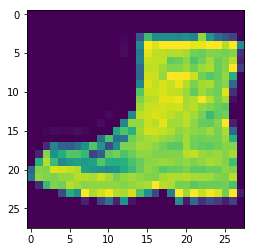

In [8]:
#visualise the sample image how it looks like in 28 * 28 pixel size
image = x_train[60,:].reshape((28,28))
plt.imshow(image)
plt.show()

Creating and Embedding variables with all the images defined above under sprite image

In [9]:
# creating the embedding variable with all the images defined above under x_test 
logdir = r'logs'
embedding_var = tf.Variable(x_test, name='fmnist_embedding')
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name

embedding.metadata_path = os.path.join(logdir, 'metadata.tsv')
embedding.sprite.image_path = os.path.join(logdir, 'sprite.png')
embedding.sprite.single_image_dim.extend([28, 28])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
# Create the sprite image
rows = 28
cols = 28

label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sprite_dim = int(np.sqrt(x_test.shape[0]))

sprite_image = np.ones((cols * sprite_dim, rows * sprite_dim))

index = 0
labels = []
for i in range(sprite_dim):
    for j in range(sprite_dim):
        
        labels.append(label[int(y_test[index])])
        
        sprite_image[
            i * cols: (i + 1) * cols,
            j * rows: (j + 1) * rows
        ] = x_test[index].reshape(28, 28) * -1 + 1
        
        index += 1

If we will inlarge the image below it, we can see all the images clearly.



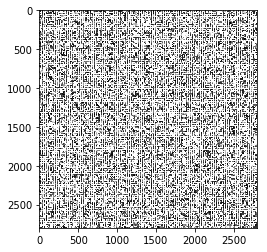

In [11]:
with open(embedding.metadata_path, 'w') as meta:
    meta.write('Index\tLabel\n')
    for index, label in enumerate(labels):
        meta.write('{}\t{}\n'.format(index, label))
        
plt.imsave(embedding.sprite.image_path, sprite_image, cmap='gray')
plt.imshow(sprite_image, cmap='gray')
plt.show()

Re-sizing the image below before we can define the CNN model. Defined the shape of the image as 3d with rows and columns and 1 for the 3d visualisation

In [12]:
image_rows = 28
image_cols = 28
batch_size = 512
image_shape = (image_rows,image_cols,1) 

I am formatting on the x_train, x_test and x_validate dataset which are my training, test and validation dataset

In [13]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

Now, i will print the internal shape of the x_train,x_test and x_validate. So that we can see how they look like

In [14]:

print("x_train shape = {}".format(x_train.shape))
print("x_test shape = {}".format(x_test.shape))
print("x_validate shape = {}".format(x_validate.shape))

x_train shape = (48000, 28, 28, 1)
x_test shape = (10000, 28, 28, 1)
x_validate shape = (12000, 28, 28, 1)


# Define Model

I will define the mode, compile the model and then fit it.

I am using a 3 layered CNN. And the activation function which is being used is 'RELU' and The last layers is a dense layer with softmax activation that classifies the 10 categories of data in fashion_mnist.

I am defining the input shape of the first, second and third CNN layer of the neural network

The dropout rate is set to 20% in the first and second CNN layer, meaning one in 5 inputs will be randomly excluded from each update cycle. It is used to avoid overfitting and it consists of randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

The pooling layer using MaxPooling2D follows the nonlinear layer. It works with width and height of the image and performs a downsampling operation on them. As a result the image volume is reduced. This means that if some features (as for example boundaries) have already been identified in the previous convolution operation, than a detailed image is no longer needed for further processing, and it is compressed to less detailed pictures.

Flatten has been used to convert all the resultant 2 dimensional arrays into a single long continuous linear vector.

Dense has been used as all the nodes in the layer is connected to all the nodes in the previous layer.

And Convo2D is the method which will actually create a 2d convolutional kernal which will be convolved with the input layer to produce a tensor of output. 

In [15]:
name = '1_Layer'
cnn_model_1 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=image_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=image_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name='3_layer'
cnn_model_3 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', 
           input_shape=image_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    Dropout(0.4, name='Dropout-3'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dropout(0.4, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
], name=name)

cnn_models = [cnn_model_1, cnn_model_2, cnn_model_3]

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:

# the model summaries# the mo 

for model in cnn_models:
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________
____

# Data Augmentation

I am using ZCA Whitening for the data augmentation

A whitening transform of an image is a linear algebra operation that reduces the redundancy in the matrix of pixel images.

Less redundancy in the image is intended to better highlight the structures and features in the image to the learning algorithm.

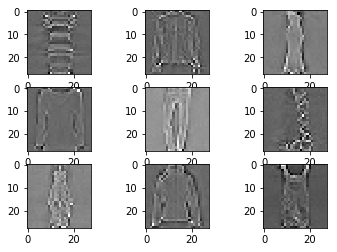

In [17]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from matplotlib import pyplot
K.set_image_dim_ordering('th')
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break


# Compile and Train
We use model.compile() to configure the learning process before training the model. This is where you define the type of loss function, optimizer and the metrics evaluated by the model during training and testing.

After compilation of the model, we will train the model with 50 epoch. I am using sparse_categorical_crossentropy to keep integer as chars, multi-class classification labels without transforming to one-hot labels. So, the output of the model will be in softmax one-hot like shape while the labels are integers.
Adam optimizer is being used for stochastic gradient descent. Stochastic gradient descent maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training. 

Accuracy (precision) is used as a metrics as it will assign a score for every input.

In [20]:

# train the models and save results to a dictionary

history_dict = {}

for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=50, verbose=1,
        validation_data=(x_validate, y_validate)
    )
    
    history_dict[model.name] = history

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 13s 270us/step - loss: 0.5864 - acc: 0.7967 - val_loss: 0.4546 - val_acc: 0.8433
Epoch 2/50
48000/48000 [==============================] - 12s 258us/step - loss: 0.4283 - acc: 0.8486 - val_loss: 0.4030 - val_acc: 0.8594
Epoch 3/50
48000/48000 [==============================] - 13s 281us/step - loss: 0.3749 - acc: 0.8674 - val_loss: 0.3548 - val_acc: 0.8781
Epoch 4/50
48000/48000 [==============================] - 14s 300us/step - loss: 0.3483 - acc: 0.8780 - val_loss: 0.3469 - val_acc: 0.8779
Epoch 5/50
48000/48000 [==============================] - 14s 300us/step - loss: 0.3293 - acc: 0.8846 - val_loss: 0.3182 - val_acc: 0.8894
Epoch 6/50
48000/48000 [==============================] - 14s 297us/step - loss: 0.3193 - acc: 0.8885 - val_loss: 0.3140 - val_acc: 0.8901
Epoch 7/50
48000/48000 [==============================] - 14s 298us/step - loss: 0.3031 - acc: 0.8926 - val_loss: 0.

Epoch 9/50
48000/48000 [==============================] - 31s 645us/step - loss: 0.2632 - acc: 0.9046 - val_loss: 0.2601 - val_acc: 0.9042
Epoch 10/50
48000/48000 [==============================] - 31s 646us/step - loss: 0.2562 - acc: 0.9073 - val_loss: 0.2432 - val_acc: 0.9116
Epoch 11/50
48000/48000 [==============================] - 31s 650us/step - loss: 0.2437 - acc: 0.9120 - val_loss: 0.2463 - val_acc: 0.9112
Epoch 12/50
48000/48000 [==============================] - 31s 649us/step - loss: 0.2337 - acc: 0.9162 - val_loss: 0.2354 - val_acc: 0.9147
Epoch 13/50
48000/48000 [==============================] - 31s 645us/step - loss: 0.2300 - acc: 0.9163 - val_loss: 0.2296 - val_acc: 0.9163
Epoch 14/50
48000/48000 [==============================] - 31s 654us/step - loss: 0.2236 - acc: 0.9194 - val_loss: 0.2278 - val_acc: 0.9160
Epoch 15/50
48000/48000 [==============================] - 31s 647us/step - loss: 0.2162 - acc: 0.9213 - val_loss: 0.2307 - val_acc: 0.9164
Epoch 16/50
48000/480

# Result - Scoring the model

We will find the accuracy and test loss of each layer. And plotting a graph for that.

In [21]:

for model in cnn_models:
    print('CNN Convolutional Layer -- ', model)
    score = model.evaluate(x_test,y_test,verbose=0)
    print('Test Loss : {:.4f}'.format(score[0]))
    print('Test Accuracy : {:.4f}'.format(score[1]))
    

CNN Convolutional Layer --  <keras.engine.sequential.Sequential object at 0x000001FC199D19E8>
Test Loss : 0.2443
Test Accuracy : 0.9174
CNN Convolutional Layer --  <keras.engine.sequential.Sequential object at 0x000001FC19BAC128>
Test Loss : 0.2136
Test Accuracy : 0.9297
CNN Convolutional Layer --  <keras.engine.sequential.Sequential object at 0x000001FC19CB6D68>
Test Loss : 0.2008
Test Accuracy : 0.9357


# Plot the Accuracy and Loss

Plotting training and validation accuracy as well as loss.


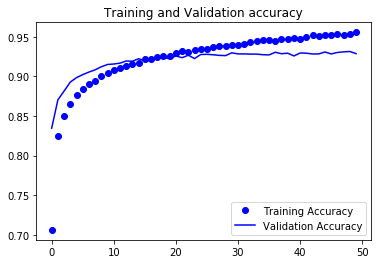

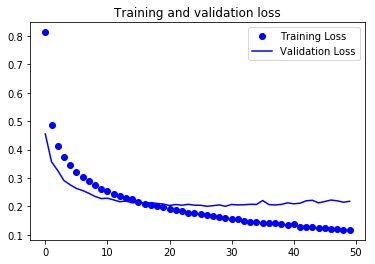

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

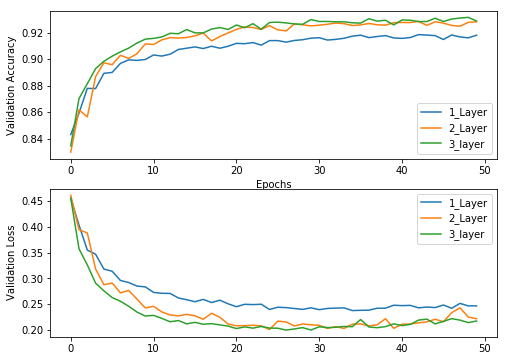

In [23]:
fig,(ax1,ax2)=plt.subplots(2,figsize=(8,6))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)

ax1.set_ylabel('Validation Accuracy')
ax2.set_ylabel('Validation Loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax2.legend()
plt.show()

# Classification Report

Summarizing the performance of classifier as follows

In [37]:

#Get the predictions for the test data
#predicted_classes = cnn_models.predict_classes(x_test)
for cnn_model in cnn_models:
    predicted_classes = cnn_model.predict_classes(x_test)
    #Get the indices to be plotted
    y_true = test_df.iloc[:, 0]
    correct = np.nonzero(predicted_classes==y_true)[0]
    incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [38]:
num_classes =10
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.91      0.88      0.89      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.94      0.87      0.90      1000
     Class 3       0.95      0.94      0.94      1000
     Class 4       0.89      0.92      0.91      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.79      0.86      0.82      1000
     Class 7       0.95      0.98      0.96      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.97      0.96      0.97      1000

   micro avg       0.94      0.94      0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



It's apparent that our classifier is underperforming for class 6 in terms of both precision and recall. For class 2, classifier is slightly lacking precision whereas it is slightly lacking recall (i.e. missed) for class 4.

Perhaps we would gain more insight after visualizing the correct and incorrect predictions.

Here is a subset of correctly predicted classes.

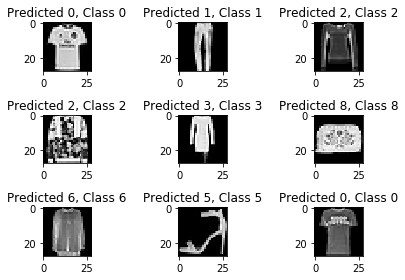

In [39]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

And here is a subset of incorrectly predicted classes.

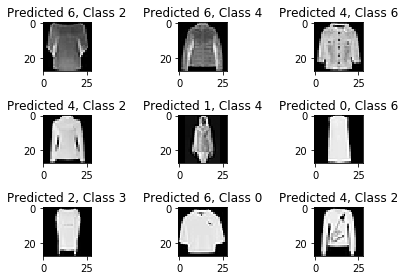

In [40]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

It looks like diversity of the similar patterns present on multiple classes effect the performance of the classifier although CNN is a robust architechture. A jacket, a shirt, and a long-sleeve blouse has similar patterns: long sleeves (or not!), buttons (or not!), and so on.